In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import feather
warnings.filterwarnings("ignore")

In [63]:
#load data into datafreame

df = pd.read_csv("Customer-Churn-Records.csv",index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
RowNumber,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [64]:
#data checks and null values
df.shape

(10000, 17)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point Ear

In [66]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')

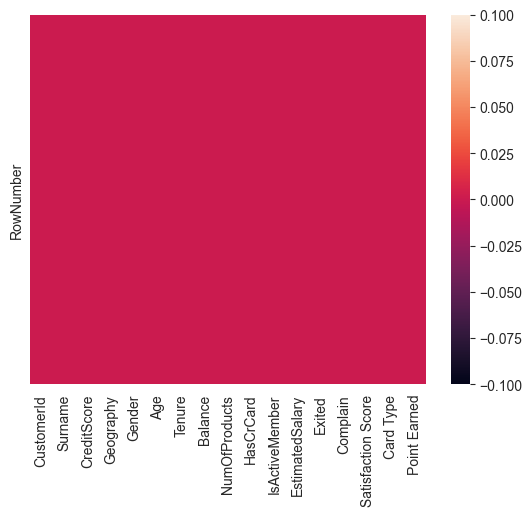

In [67]:
sns.heatmap(df.isnull(),yticklabels=False)
plt.show()

In [68]:
#Identify the outliers

lower = df['Balance'].quantile(0.25)
upper = df['Balance'].quantile(0.75)
iqr = upper -lower

lower_limit = lower - 1.5*iqr
upper_limit = upper + 1.5*iqr

df = df[~((df['Balance'] < lower_limit) | (df['Balance'] > upper_limit))]
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
RowNumber,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## EDA of Customer data

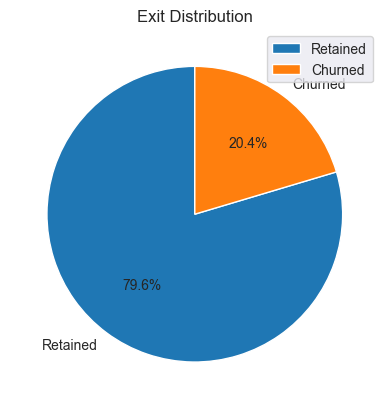

In [69]:
plt.pie(x=df['Exited'].value_counts(), labels=['Retained', 'Churned'], autopct='%1.1f%%', startangle=90)
plt.title("Exit Distribution")
plt.legend()
plt.show()

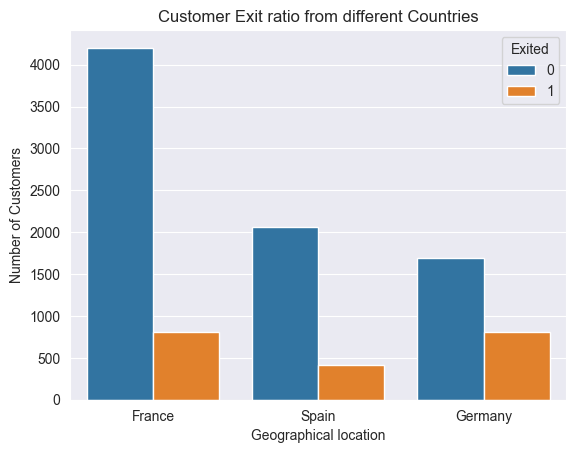

In [70]:
sns.countplot(data=df,x="Geography",hue="Exited")
plt.title("Customer Exit ratio from different Countries")
plt.ylabel("Number of Customers")
plt.xlabel("Geographical location")
plt.show()

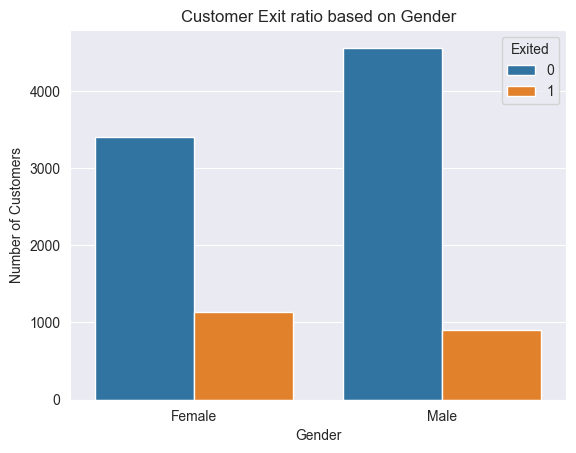

In [71]:
sns.countplot(data=df,x="Gender",hue="Exited")
plt.title("Customer Exit ratio based on Gender")
plt.ylabel("Number of Customers")
plt.xlabel("Gender")
plt.show()

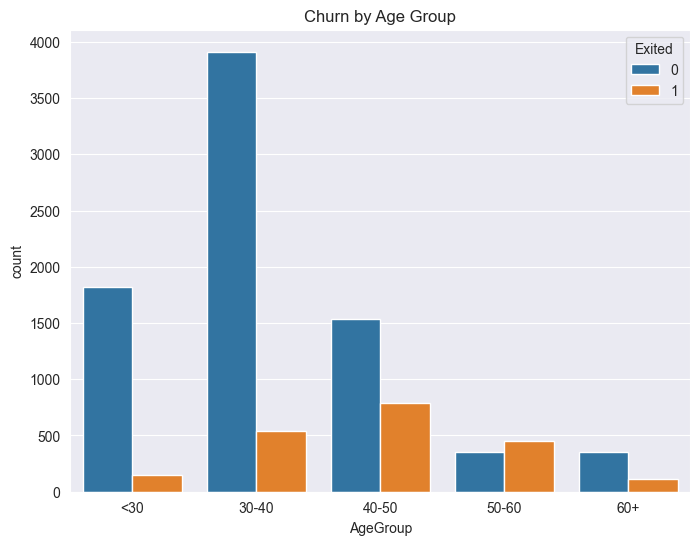

In [72]:
# Churn by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeGroup', hue='Exited', data=df)
plt.title('Churn by Age Group')
plt.show()

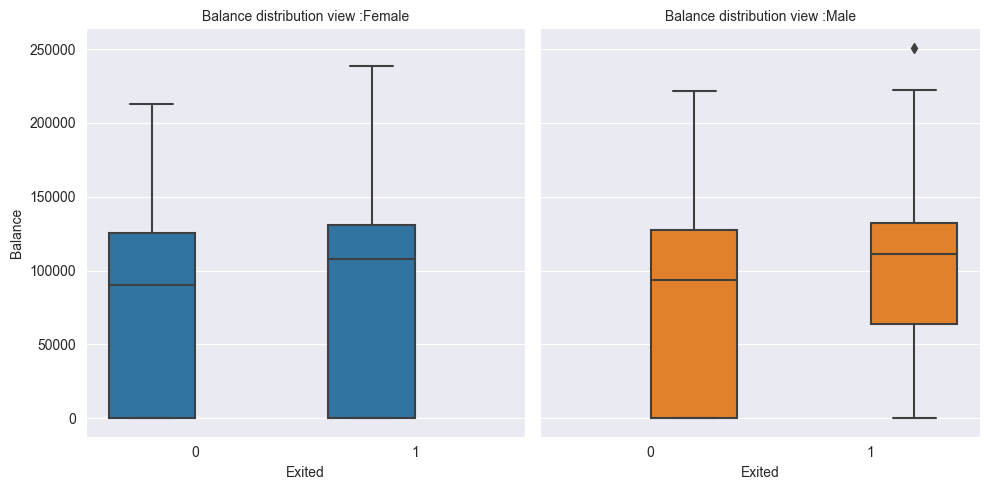

In [73]:
sns.set_style("darkgrid")
g = sns.catplot(data=df,x="Exited",y="Balance",kind='box',hue="Gender",col="Gender")
g.set_titles("Balance distribution view :{col_name}")
sns.despine()
plt.show()

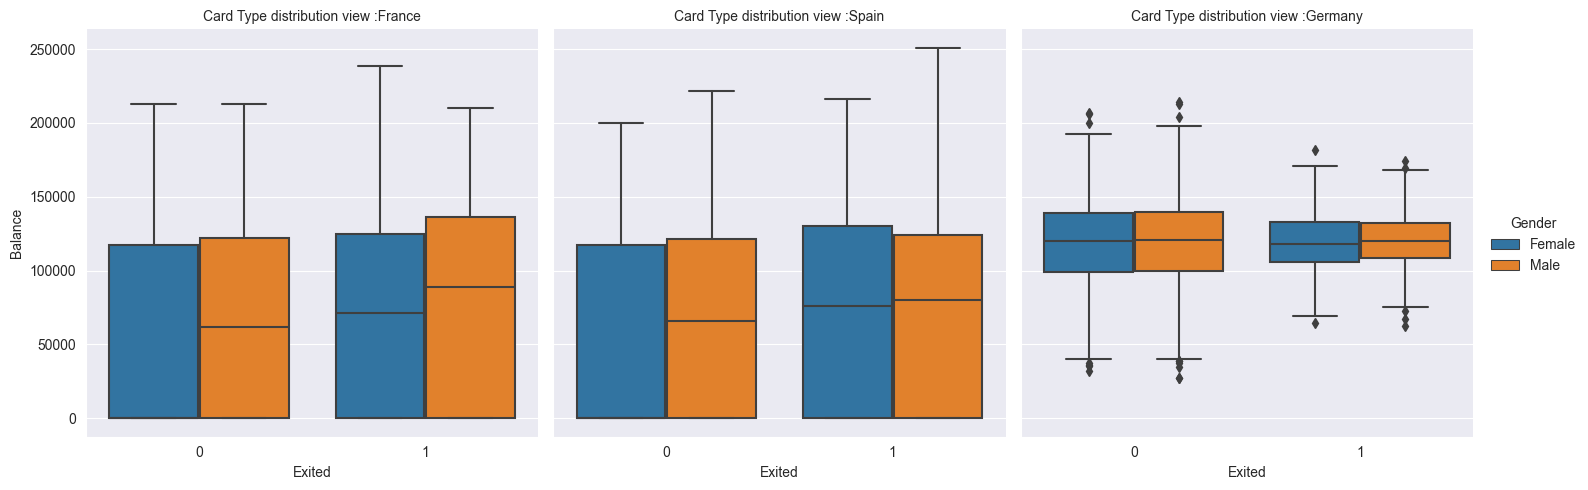

In [74]:
sns.set_style("darkgrid")
g = sns.catplot(data=df,x="Exited",y="Balance",kind='box',hue="Gender",col="Geography")
g.set_titles("Card Type distribution view :{col_name}")
sns.despine()
plt.show()

In [75]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned', 'AgeGroup'],
      dtype='object')

<Axes: xlabel='CreditScore', ylabel='Balance'>

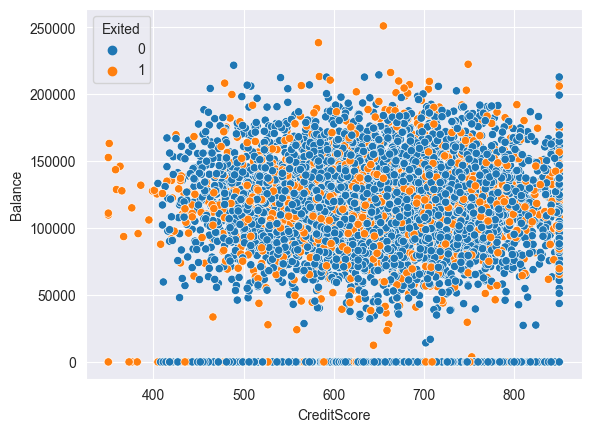

In [76]:
sns.scatterplot(data=df,x="CreditScore",y="Balance",hue="Exited")

In [78]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned', 'AgeGroup'],
      dtype='object')

In [79]:
#test and train split

from sklearn.model_selection import train_test_split

X = df.drop(["Gender","Geography","CustomerId","Surname","AgeGroup","Card Type"],axis=1).values
y = df['Exited'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [82]:
##from sklearn.module import Model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print(y_pred)
print(knn.score(X_test,y_test))

[0 1 0 ... 0 0 0]
0.7405


### This model will classify the exites customer with 74% accuracy We will check an increase the complexity 

### Model complexity

In [83]:
train_accuracy = {}
test_accuracy = {}
neighbours = np.arange(1,30)

for neighbour in neighbours:
    knn = KNeighborsClassifier(n_neighbors=neighbour)
    knn.fit(X_train,y_train)
    train_accuracy[neighbour] = knn.score(X_train,y_train)
    test_accuracy[neighbour] = knn.score(X_test,y_test)


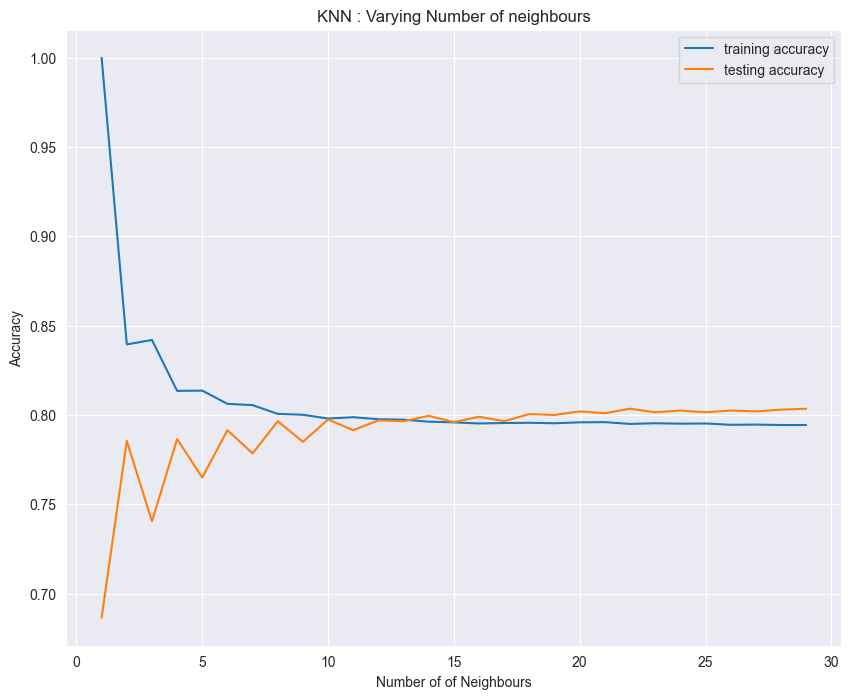

In [84]:
# plot the test train accuracy

plt.figure(figsize=(10,8))
plt.title("KNN : Varying Number of neighbours")
plt.plot(neighbours,train_accuracy.values(),label = "training accuracy")
plt.plot(neighbours,test_accuracy.values(),label = "testing accuracy")
plt.legend()
plt.xlabel("Number of of Neighbours")
plt.ylabel("Accuracy")
plt.show()

### Around the Number of neighbours 12 we are getting 80% of accuracy

## how Good is the model

In [85]:
from sklearn.metrics import classification_report,confusion_matrix

knn = KNeighborsClassifier(n_neighbors=12)  #at 12 we are getting better accouracy

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=43,test_size=0.4)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3168   21]
 [ 800   11]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      3189
           1       0.34      0.01      0.03       811

    accuracy                           0.79      4000
   macro avg       0.57      0.50      0.46      4000
weighted avg       0.71      0.79      0.71      4000



Our Model is 80% precise while predicting that Customer will not exit but it is only 34% precise while predicting the customer exit 

## Evaluvating the classification model

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X = df.drop(["Gender","Geography","CustomerId","Surname","AgeGroup","Card Type"],axis=1).values
y = df['Exited'].values.reshape(-1,1)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=32)
scaler = StandardScaler()

X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)


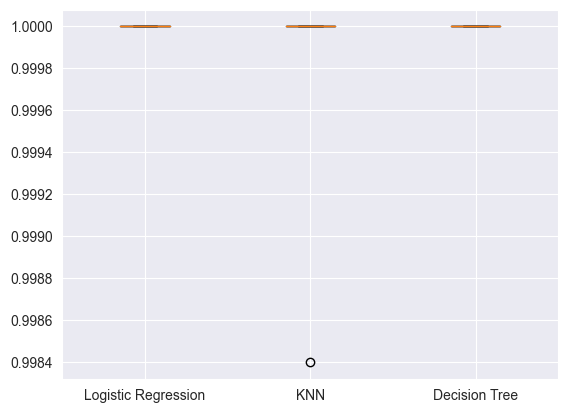

In [94]:
models = {"Logistic Regression" : LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Decision Tree":DecisionTreeClassifier()}

results = []

for model in models.values():
    kf =KFold(n_splits=6,random_state=32,shuffle=True)
    cv_results = cross_val_score(model,X_train_Scaled,y_train,cv=kf)
    results.append(cv_results)

plt.boxplot(results,labels=models.keys())
plt.show()    


## Test Set Performance

In [95]:
for name,model in models.items():
    model.fit(X_train_Scaled,y_train)
    test_score = model.score(X_test_Scaled,y_test)

    print(f"{name} Test Accuracy : {test_score}")

Logistic Regression Test Accuracy : 1.0
KNN Test Accuracy : 0.9996
Decision Tree Test Accuracy : 1.0


In [97]:
logreg = LogisticRegression()
logreg.fit(X_train_Scaled,y_train)

y_pred_prob = logreg.predict_proba(X_test_Scaled)[:,1] #slicing only possitive probability
y_pred_prob[0]

7.562755946055675e-05

In [98]:
from sklearn.metrics import roc_curve
roc_curve(y_test,y_pred_prob)

(array([0., 0., 0., 1.]),
 array([0.       , 0.0019685, 1.       , 1.       ]),
 array([1.99972375e+00, 9.99723754e-01, 8.20830197e-01, 6.45041543e-05]))

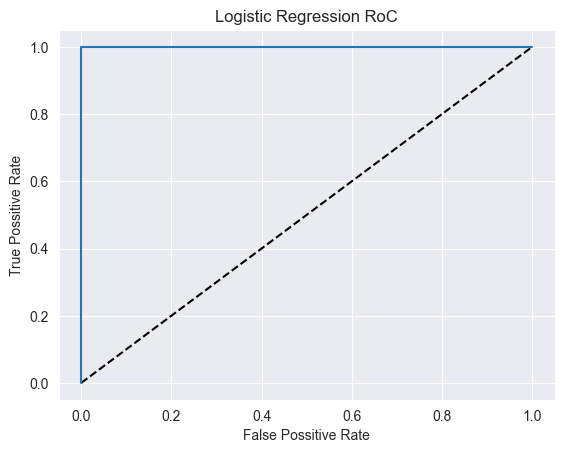

In [99]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel("False Possitive Rate")
plt.ylabel("True Possitive Rate")
plt.title("Logistic Regression RoC")
plt.show()